In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('drug200.csv')

In [5]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
data.shape

(200, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [9]:
len(data.columns)

6

In [10]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
data.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
X = data.drop(['Drug'], axis=1)
y = data['Drug']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((134, 5), (66, 5))

In [15]:
X_train.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [30]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,M,NORMAL,NORMAL,15.790
189,64,M,HIGH,NORMAL,20.932
90,62,M,NORMAL,HIGH,16.594
136,55,F,HIGH,HIGH,10.977
51,67,M,NORMAL,NORMAL,10.898


In [31]:
pip install --upgrade category_encoders

In [34]:
# import category encoders
import category_encoders as ce

In [35]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [36]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,1,1,15.790
189,64,1,2,1,20.932
90,62,1,1,2,16.594
136,55,2,2,2,10.977
51,67,1,1,1,10.898


In [37]:
X_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,3,1,11.424
15,16,2,2,1,15.516
30,18,2,1,1,8.750
158,59,2,3,2,10.444
128,47,1,3,1,33.542


In [38]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8485
Training-set accuracy score: 0.8358


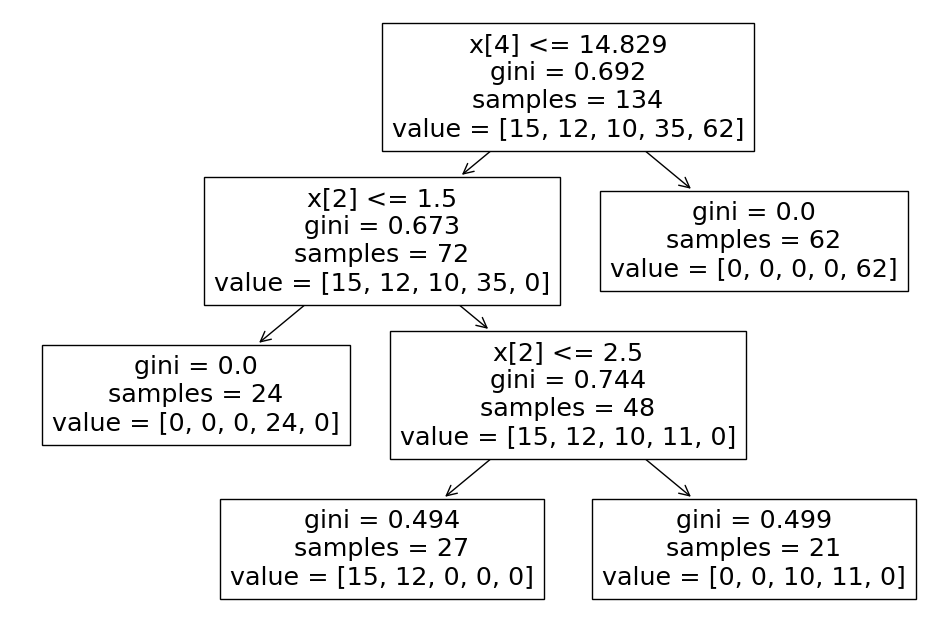

In [40]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

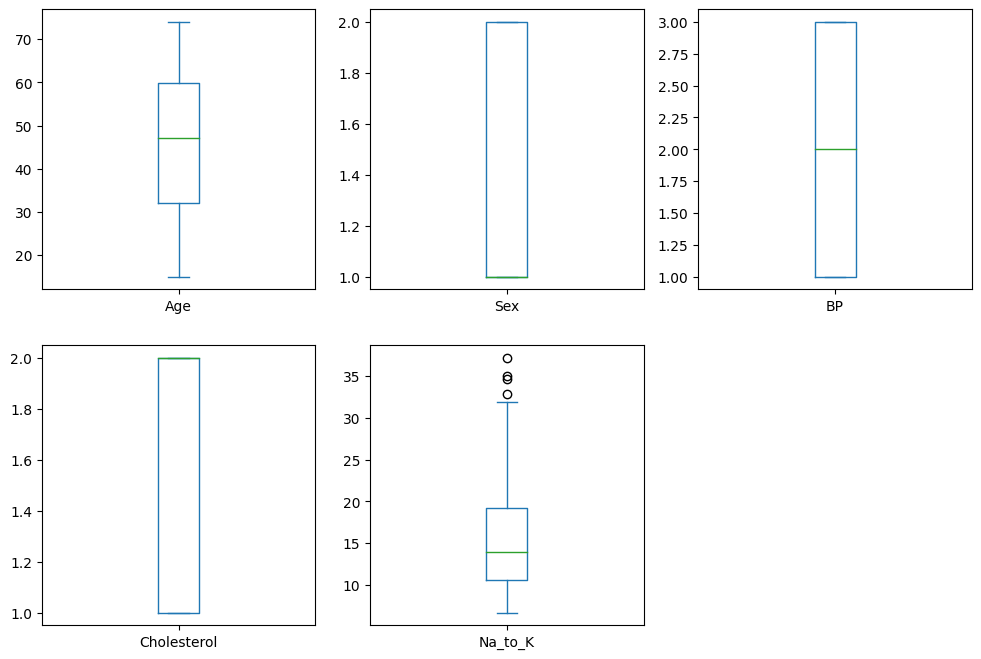

In [41]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

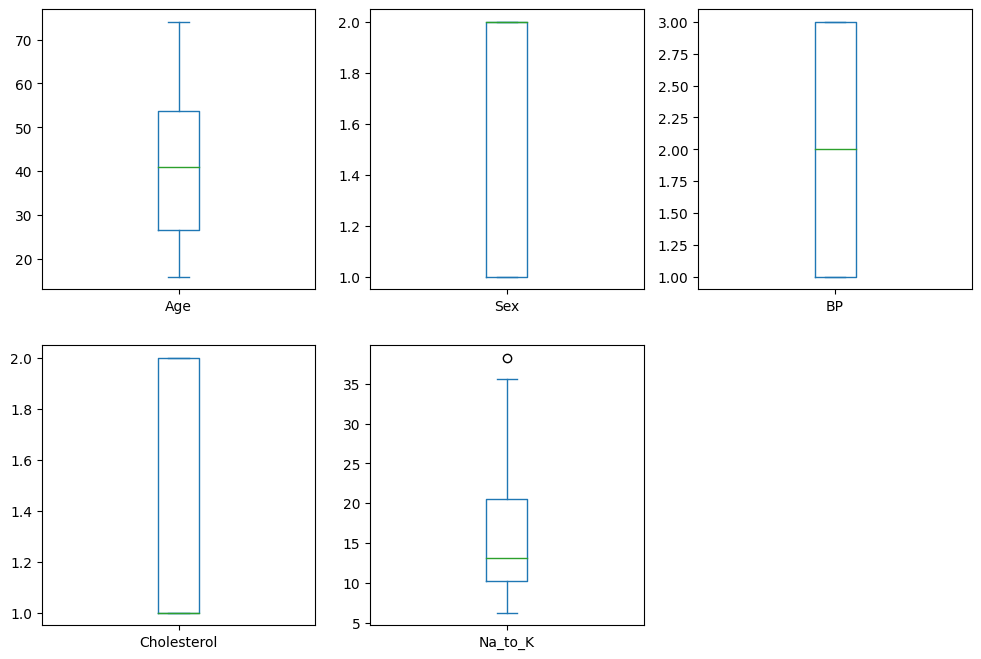

In [42]:
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

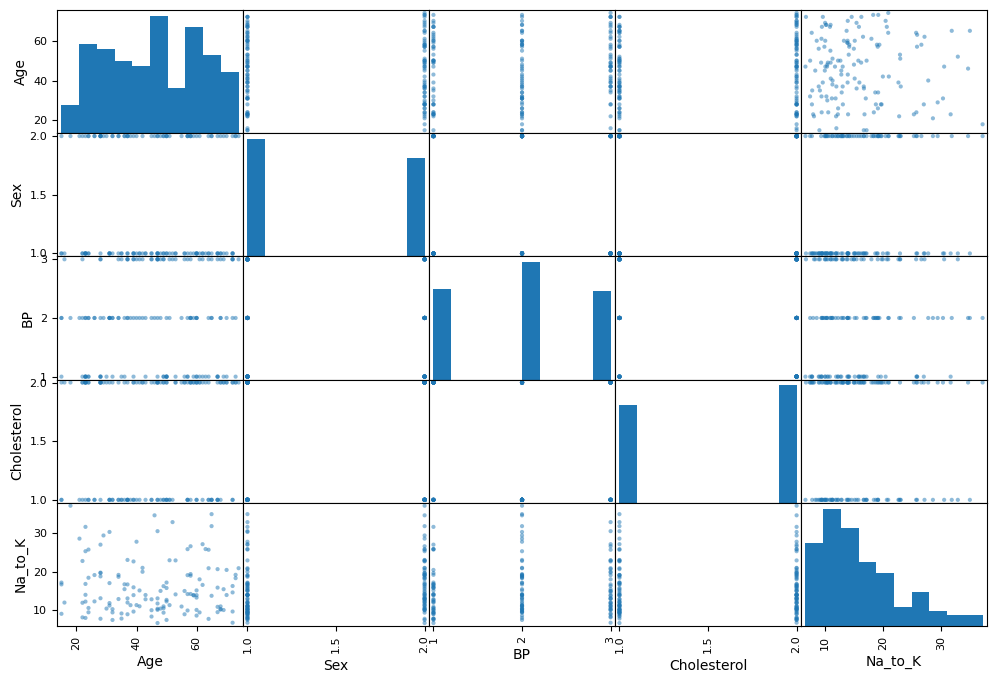

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(12,8))
plt.show()

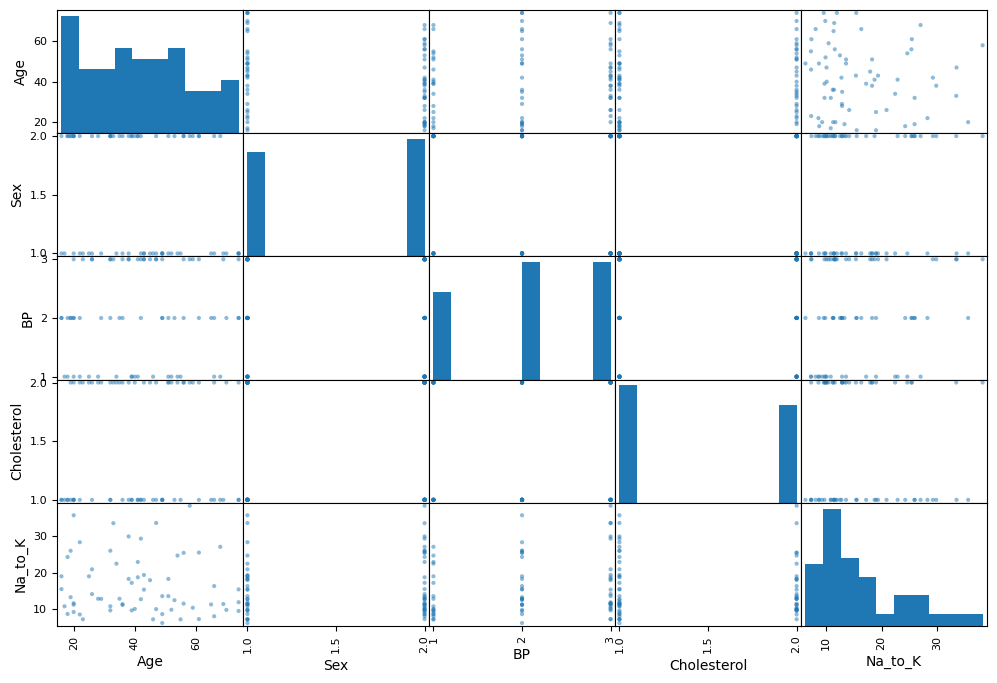

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_test, figsize=(12,8))
plt.show()

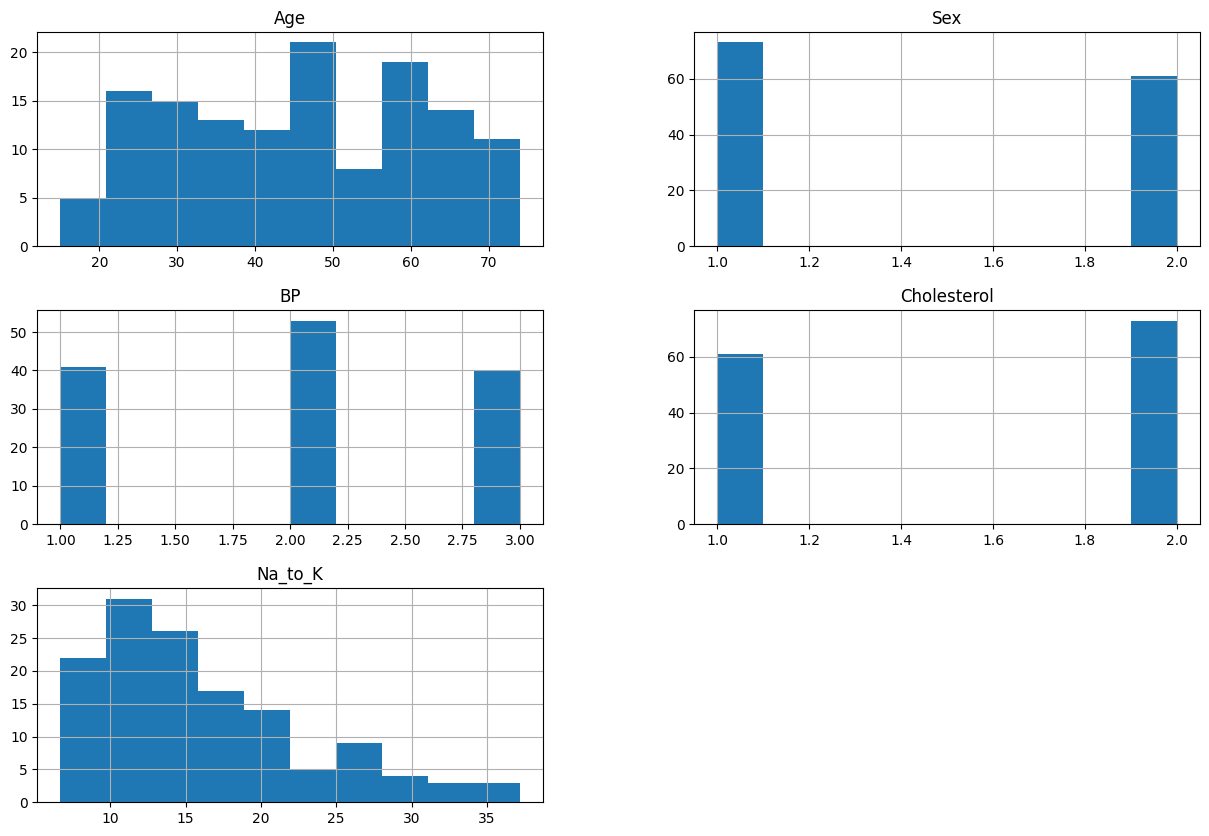

In [45]:
X_train.hist(figsize=(15,10))
plt.show()

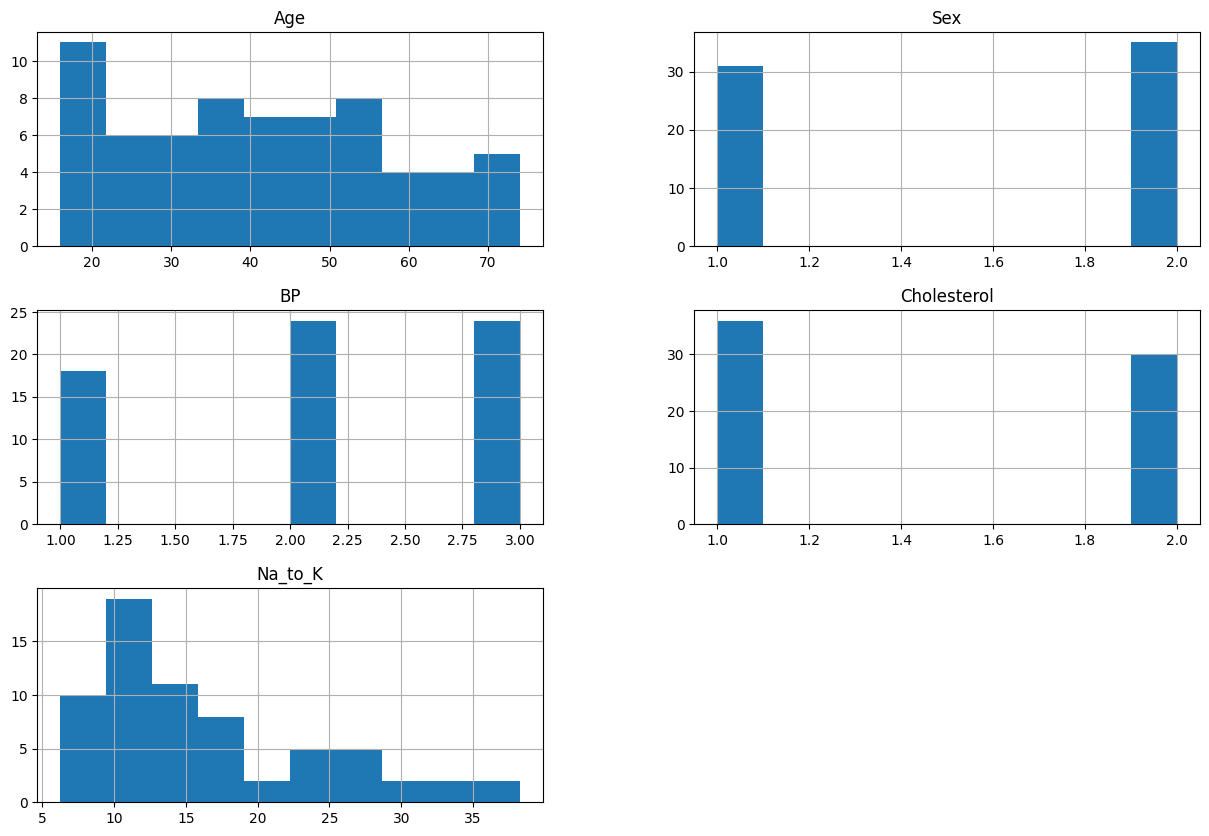

In [46]:
X_test.hist(figsize=(15,10))
plt.show()

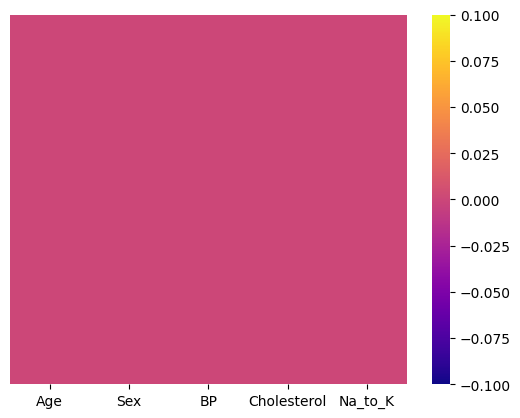

In [47]:
sns.heatmap(X_train.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

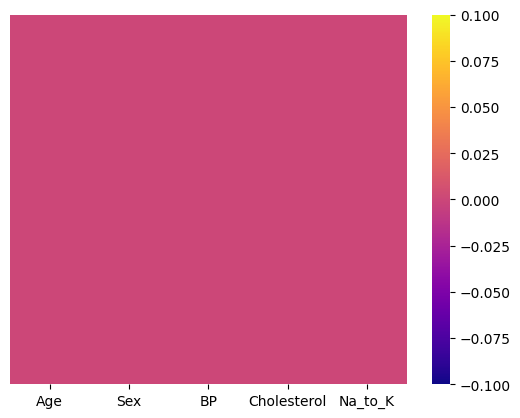

In [48]:
sns.heatmap(X_test.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

In [49]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8485
Training-set accuracy score: 0.8358


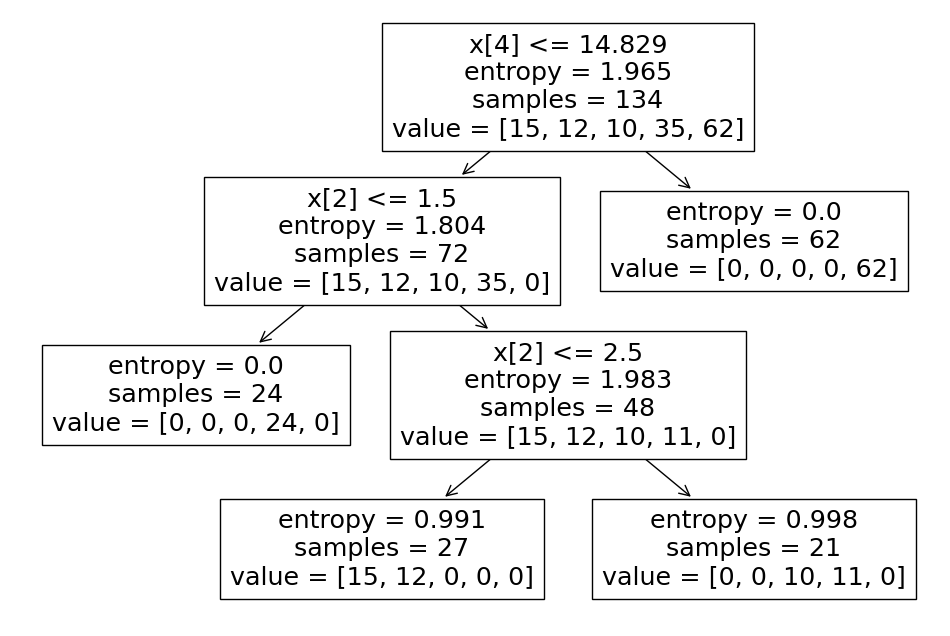

In [50]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_en)

array([[ 8,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 29]])

In [52]:
if accuracy_score(y_test, y_pred_gini) > accuracy_score(y_train, y_pred_train_en):
   print("Gini Index Criterion is Better and it has accuracy equal to ", accuracy_score(y_test, y_pred_gini)*100)
else:
    print("Entropy Criterion is Better and it has accuracy equal to ", accuracy_score(y_train, y_pred_train_en)*100)

Gini Index Criterion is Better and it has accuracy equal to  84.84848484848484


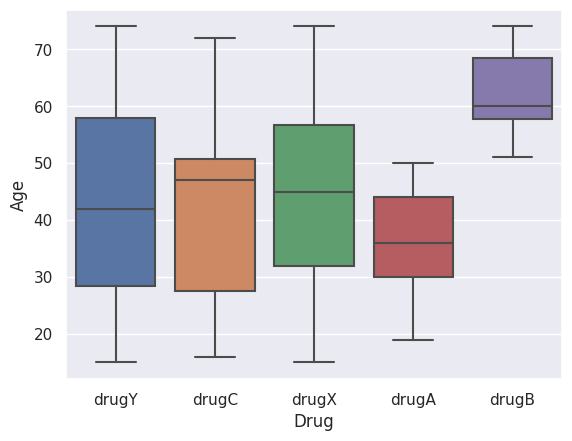

In [53]:
sns.set_theme(style="darkgrid")
sns.boxplot(x= "Drug", y="Age", data = data)
plt.show()